   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.7 MB/s

<ipython-input-1-531e3c949c27>:11: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


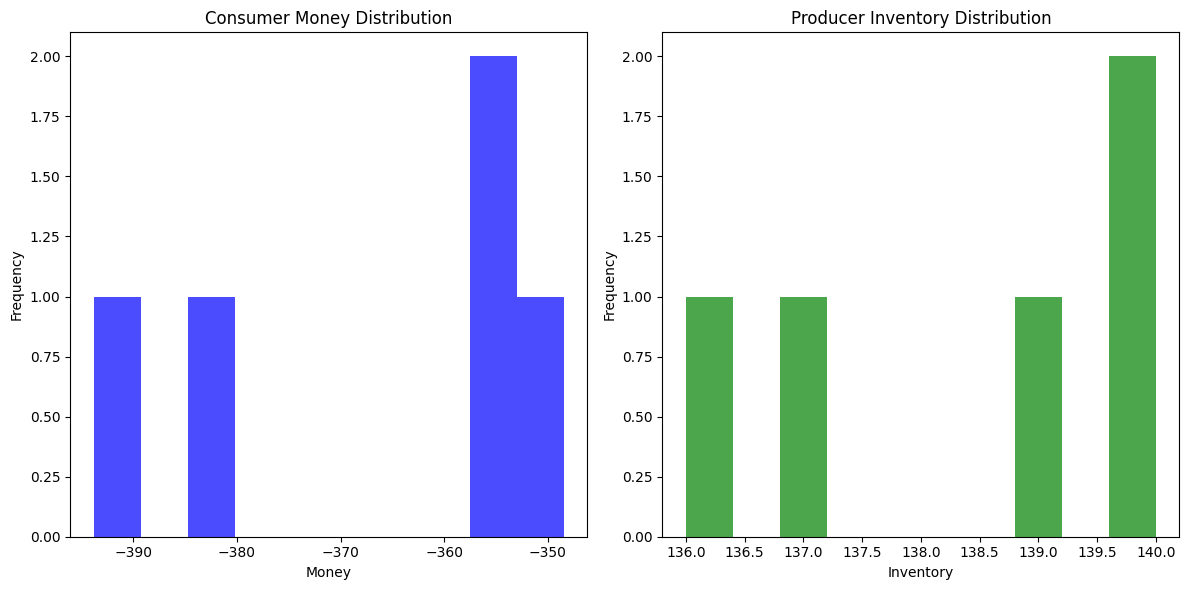

In [ ]:
!pip install mesa
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Consumer agent with loss aversion
class ConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Producer agent with loss aversion
class ProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 2 == 0:
                a = ConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            else:
                a = ProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(10, 10, 10)
for i in range(100):
    model.step()

# Visualization
consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ConsumerAgent)]
producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ProducerAgent)]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(consumer_money, bins=10, alpha=0.7, color='blue')
plt.title('Consumer Money Distribution')
plt.xlabel('Money')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(producer_inventory, bins=10, alpha=0.7, color='green')
plt.title('Producer Inventory Distribution')
plt.xlabel('Inventory')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


<ipython-input-2-54a28658db62>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


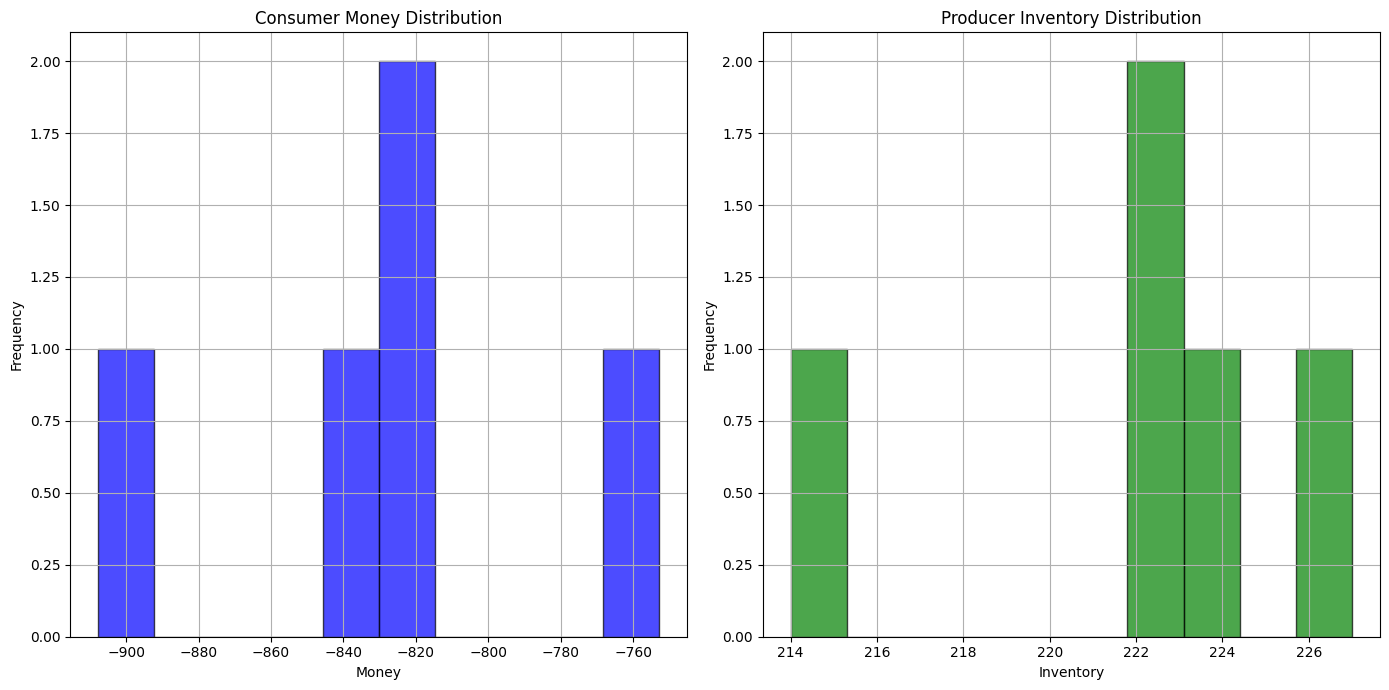

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Consumer agent with loss aversion
class ConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Producer agent with loss aversion
class ProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 2 == 0:
                a = ConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            else:
                a = ProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(10, 10, 10)
for i in range(200):
    model.step()

# Collect data
consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ConsumerAgent)]
producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ProducerAgent)]

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Distribution
plt.subplot(1, 2, 1)
plt.hist(consumer_money, bins=10, alpha=0.7, color='blue', edgecolor='black')
plt.title('Consumer Money Distribution')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.grid(True)

# Producer Inventory Distribution
plt.subplot(1, 2, 2)
plt.hist(producer_inventory, bins=10, alpha=0.7, color='green', edgecolor='black')
plt.title('Producer Inventory Distribution')
plt.xlabel('Inventory')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-3-22b50457f750>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


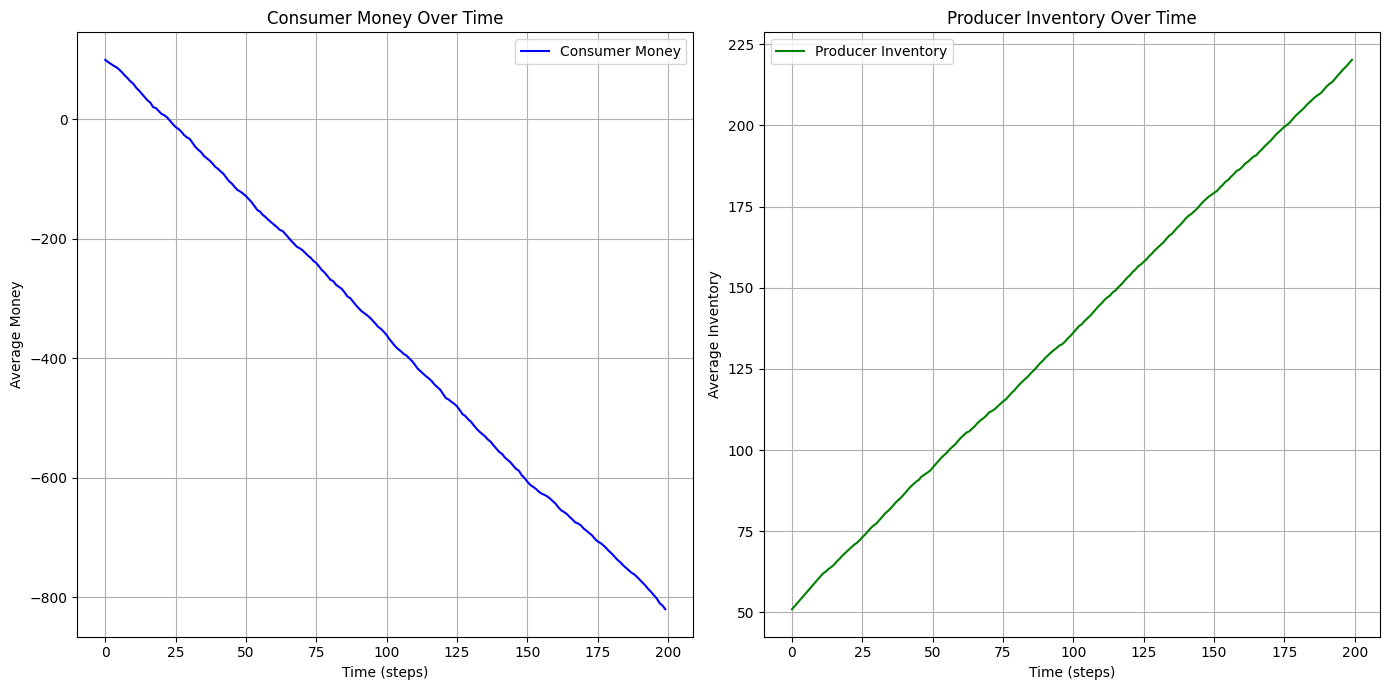

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Consumer agent with loss aversion
class ConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Producer agent with loss aversion
class ProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 2 == 0:
                a = ConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            else:
                a = ProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(10, 10, 10)

# Store the results for visualization
consumer_money_over_time = []
producer_inventory_over_time = []

for i in range(200):
    model.step()

    consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ConsumerAgent)]
    producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ProducerAgent)]

    # Record the average money and inventory
    consumer_money_over_time.append(np.mean(consumer_money))
    producer_inventory_over_time.append(np.mean(producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(consumer_money_over_time, color='blue', label='Consumer Money')
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(producer_inventory_over_time, color='green', label='Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-4-ac6746d092d7>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


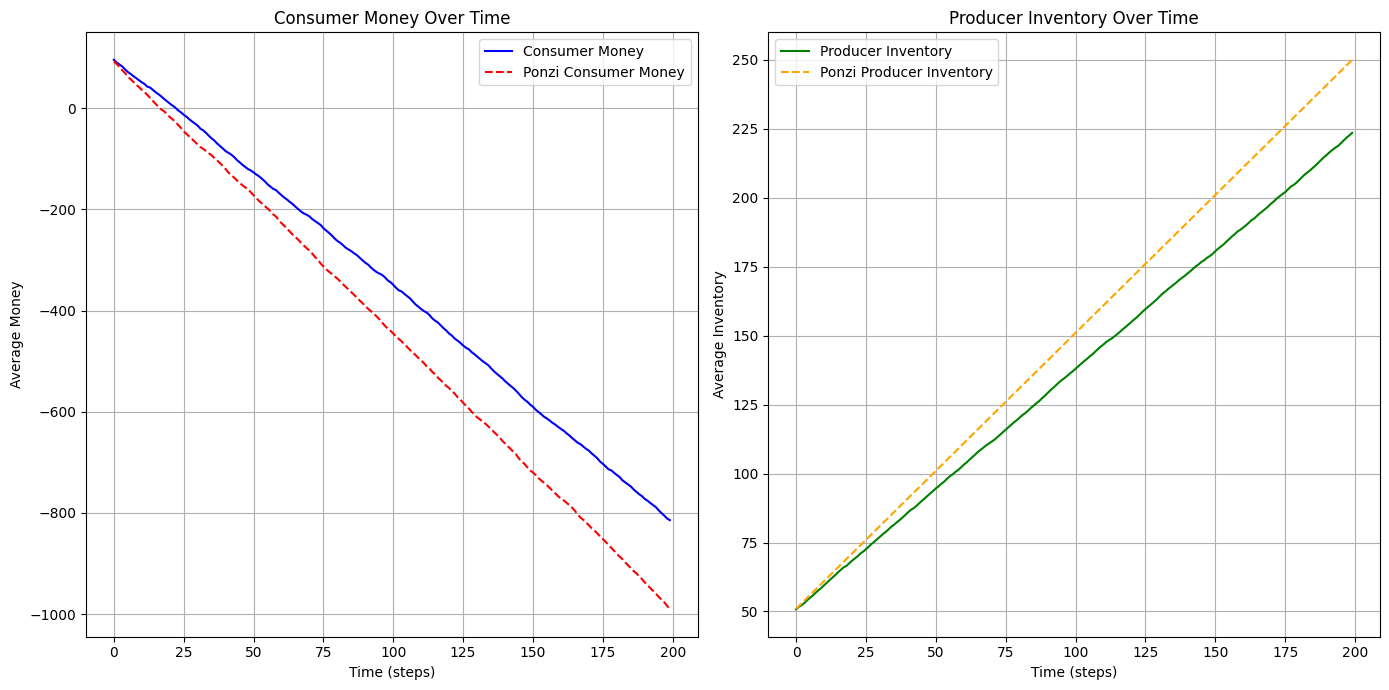

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Base Consumer agent with loss aversion
class ConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Consumer agent with Ponzi behavior
class PonziConsumerAgent(ConsumerAgent):
    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Base Producer agent with loss aversion
class ProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Producer agent with Ponzi behavior
class PonziProducerAgent(ProducerAgent):
    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 4 == 0:
                a = ConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            elif i % 4 == 1:
                a = PonziConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            elif i % 4 == 2:
                a = ProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(40, 10, 10)

# Store the results for visualization
consumer_money_over_time = []
ponzi_consumer_money_over_time = []
producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ConsumerAgent) and not isinstance(agent, PonziConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ProducerAgent) and not isinstance(agent, PonziProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    consumer_money_over_time.append(np.mean(consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    producer_inventory_over_time.append(np.mean(producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(consumer_money_over_time, color='blue', label='Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(producer_inventory_over_time, color='green', label='Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-5-ee65cdddedf8>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


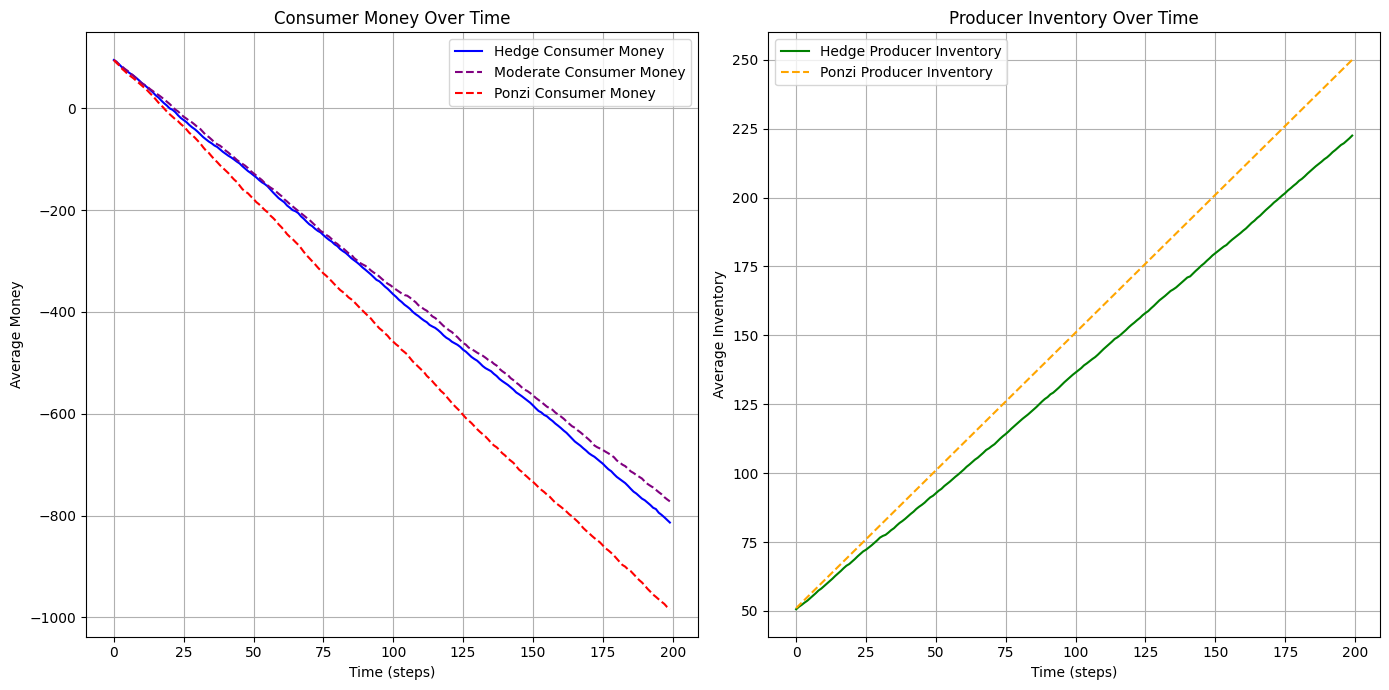

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 5 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            elif i % 5 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=100)
            elif i % 5 == 2:
                a = PonziConsumerAgent(i, self, initial_money=100)
            elif i % 5 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(50, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-6-ae851056faa5>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


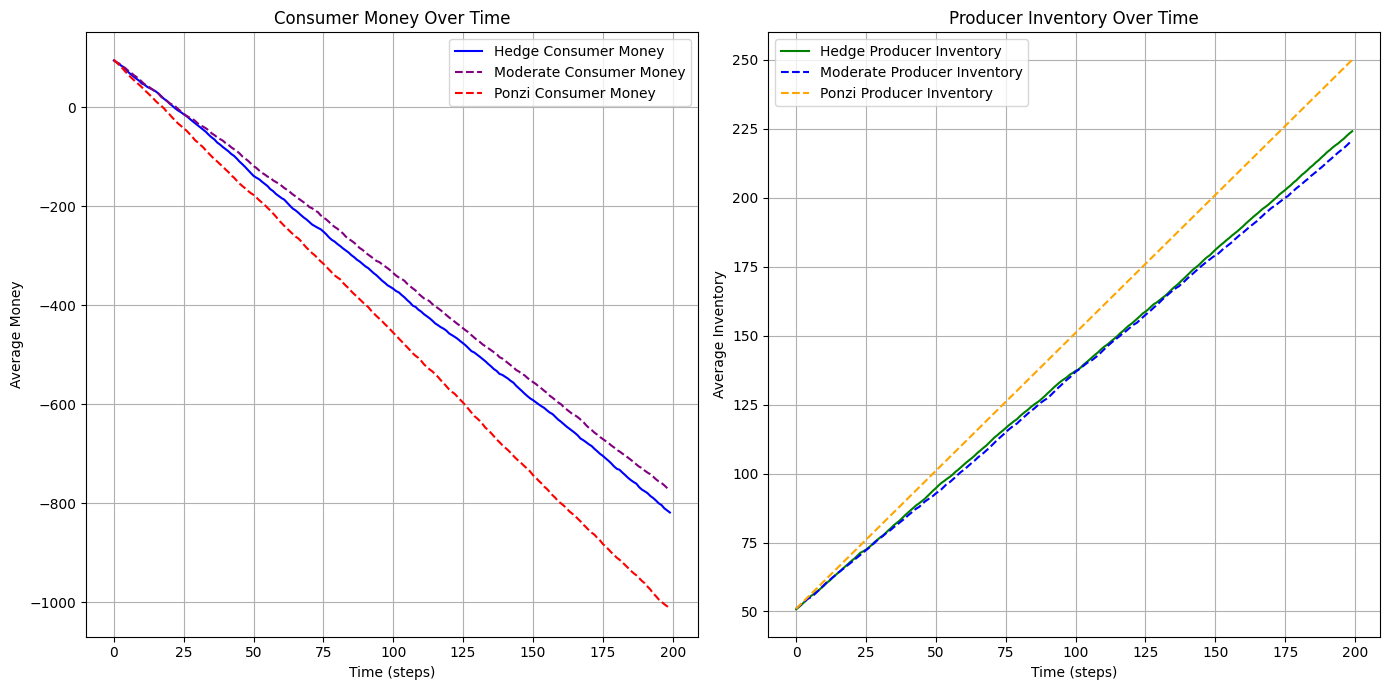

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=100)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=100)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-7-5621257d0a3e>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


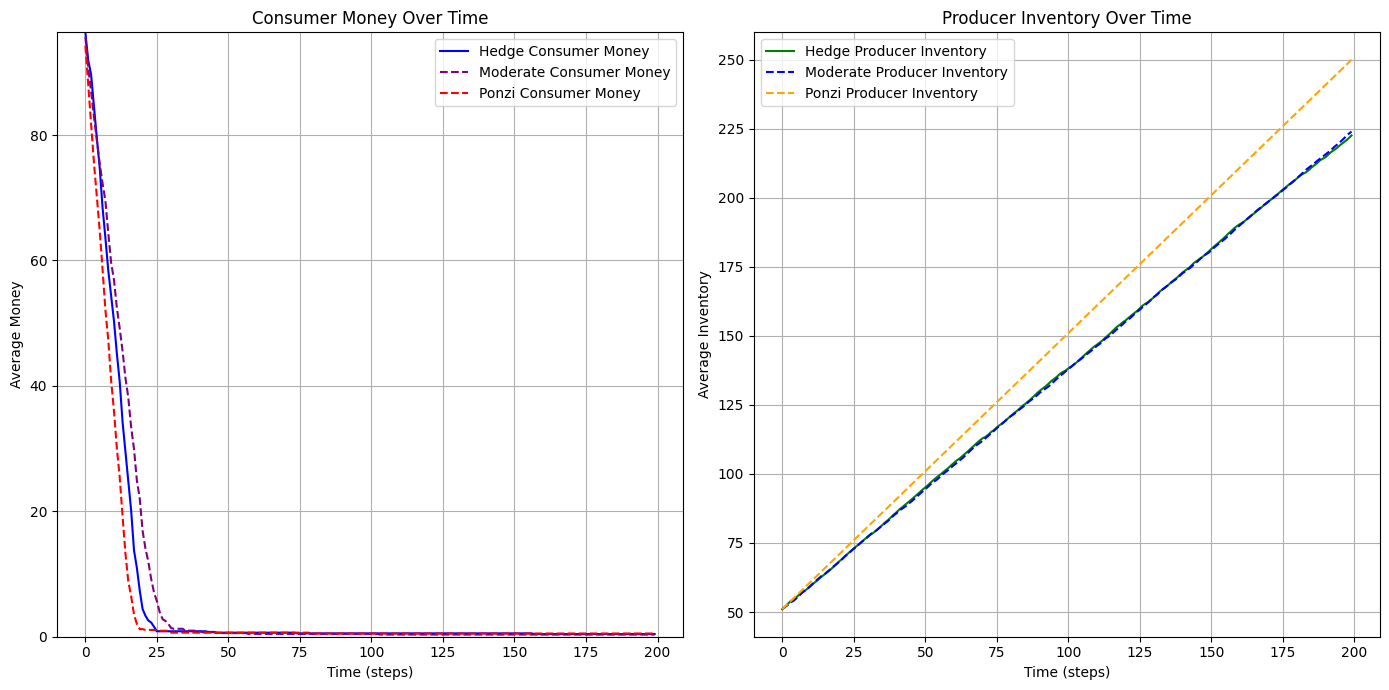

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss and self.money > price:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0 and self.money > price:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0 and self.money > price:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=100, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=100)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=100)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, max(hedge_consumer_money_over_time + moderate_consumer_money_over_time + ponzi_consumer_money_over_time))
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(min(hedge_consumer_money_over_time + moderate_consumer_money_over_time + ponzi_consumer_money_over_time), 1200)
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<ipython-input-8-bfc73154630d>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


TypeError: PonziProducerAgent.__init__() got multiple values for argument 'initial_inventory'

<ipython-input-9-52a6b8cda600>:10: FutureWarning: The Mesa Model class was not initialized. In the future, you need to explicitly initialize the Model by calling super().__init__() on initialization.
  super().__init__(unique_id, model)


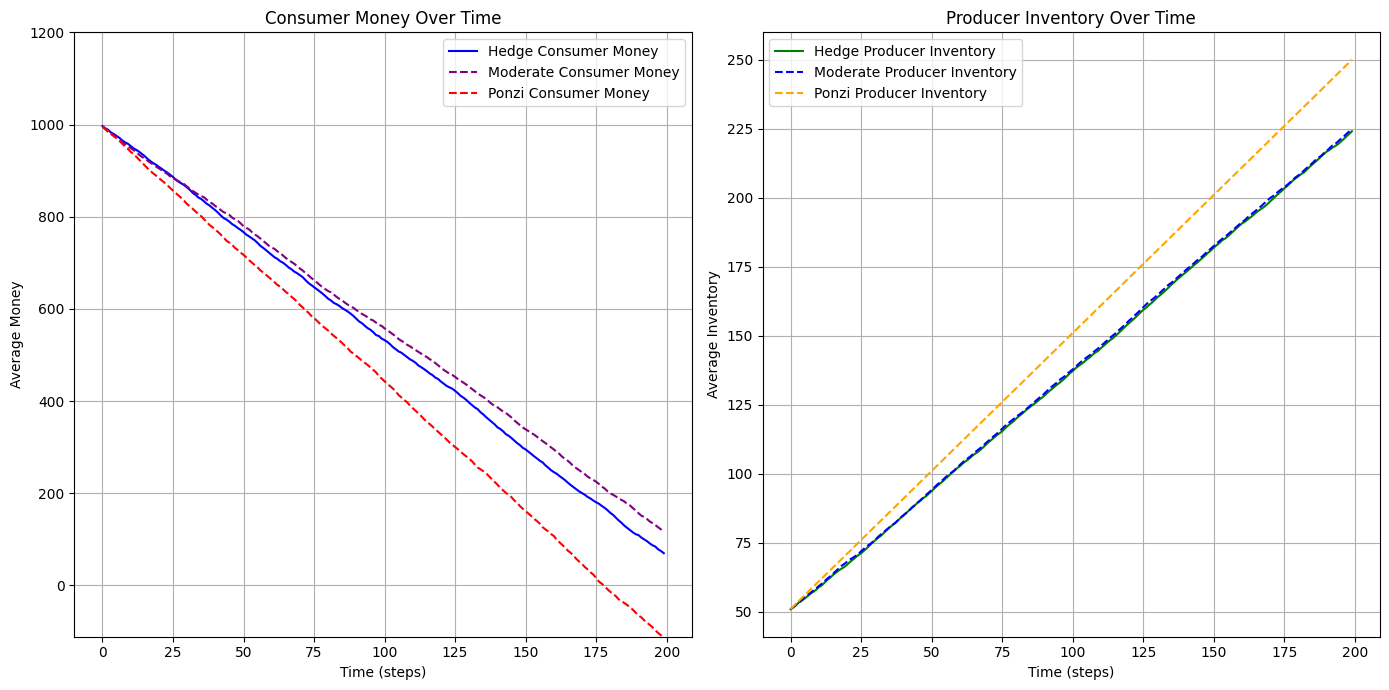

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(min(hedge_consumer_money_over_time + moderate_consumer_money_over_time + ponzi_consumer_money_over_time), 1200)
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


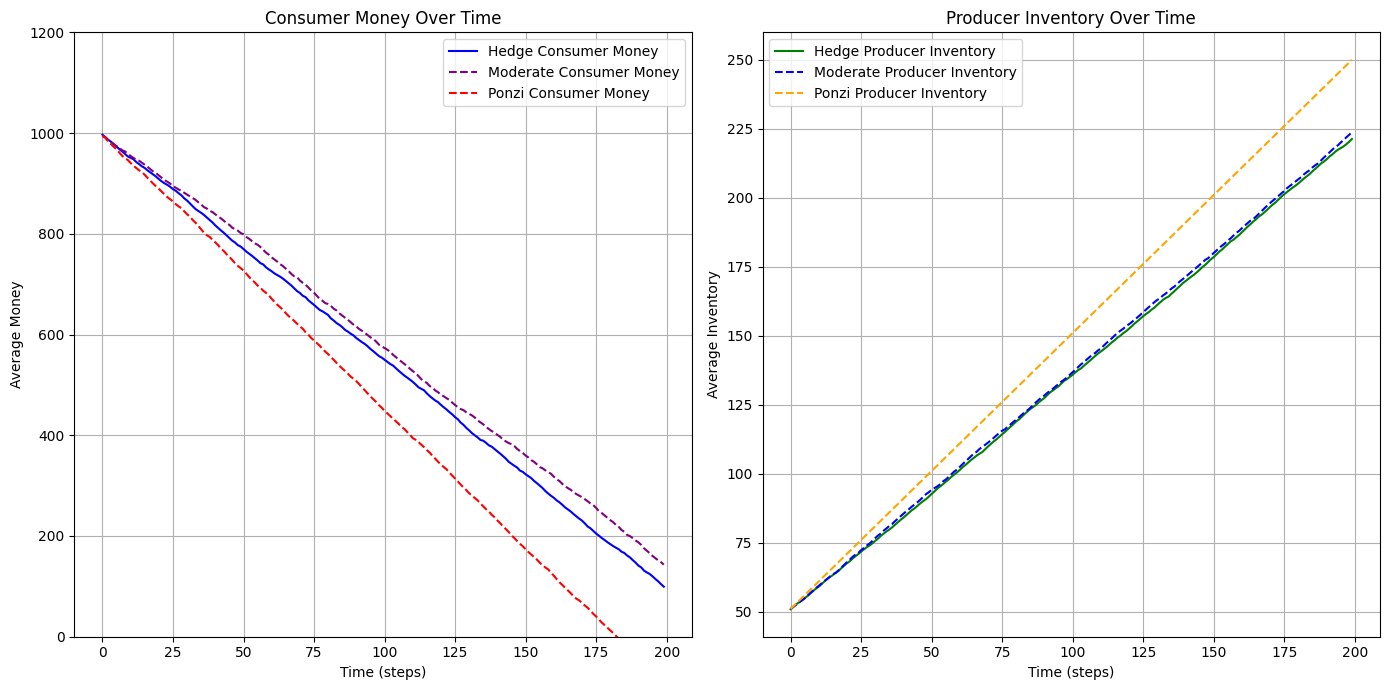

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)  # Adjusted to start from 0
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


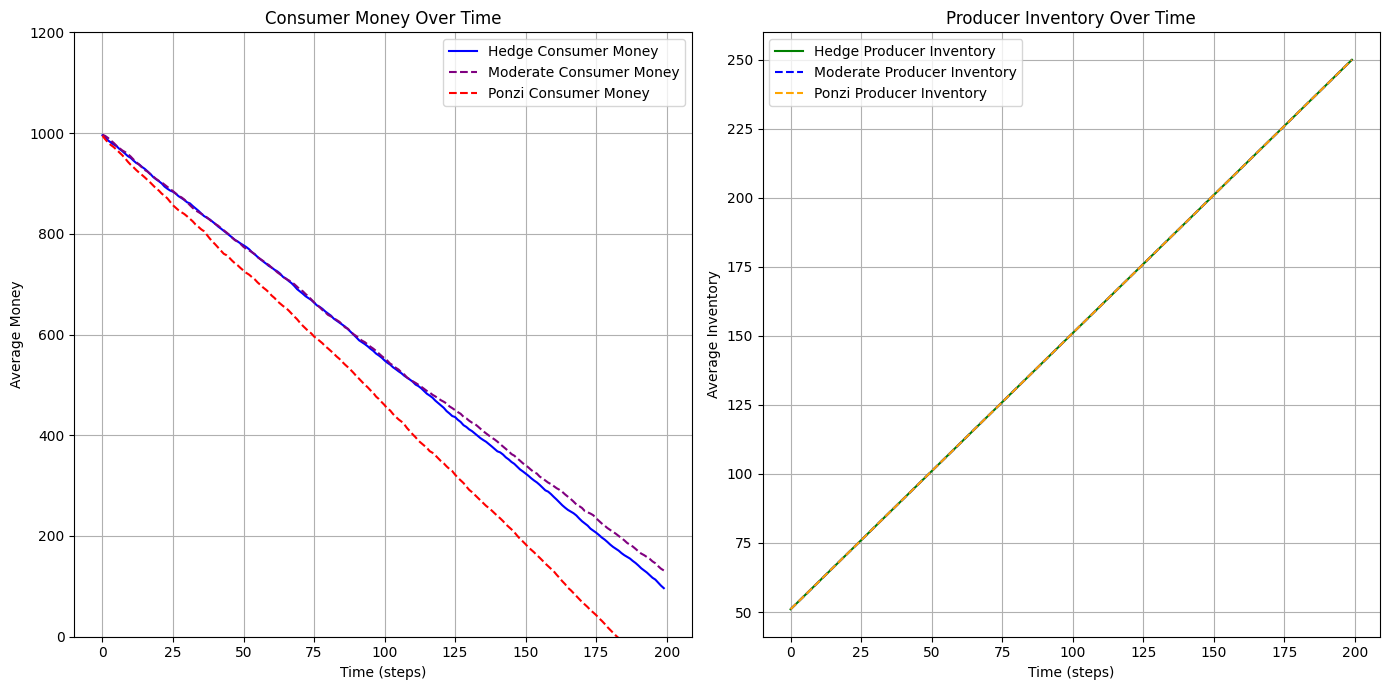

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion and price
        cost = np.random.uniform(1, 10)
        revenue = self.model.price_per_unit * self.inventory
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision based on price
        cost = np.random.uniform(1, 10)
        revenue = self.model.price_per_unit * self.inventory
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision based on price
        cost = np.random.uniform(1, 10)
        expected_future_revenue = self.model.price_per_unit * np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height, price_per_unit):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.price_per_unit = price_per_unit

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10, price_per_unit=10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(14, 7))

# Consumer Money Over Time
plt.subplot(1, 2, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)  # Adjusted to start from 0
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 2, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


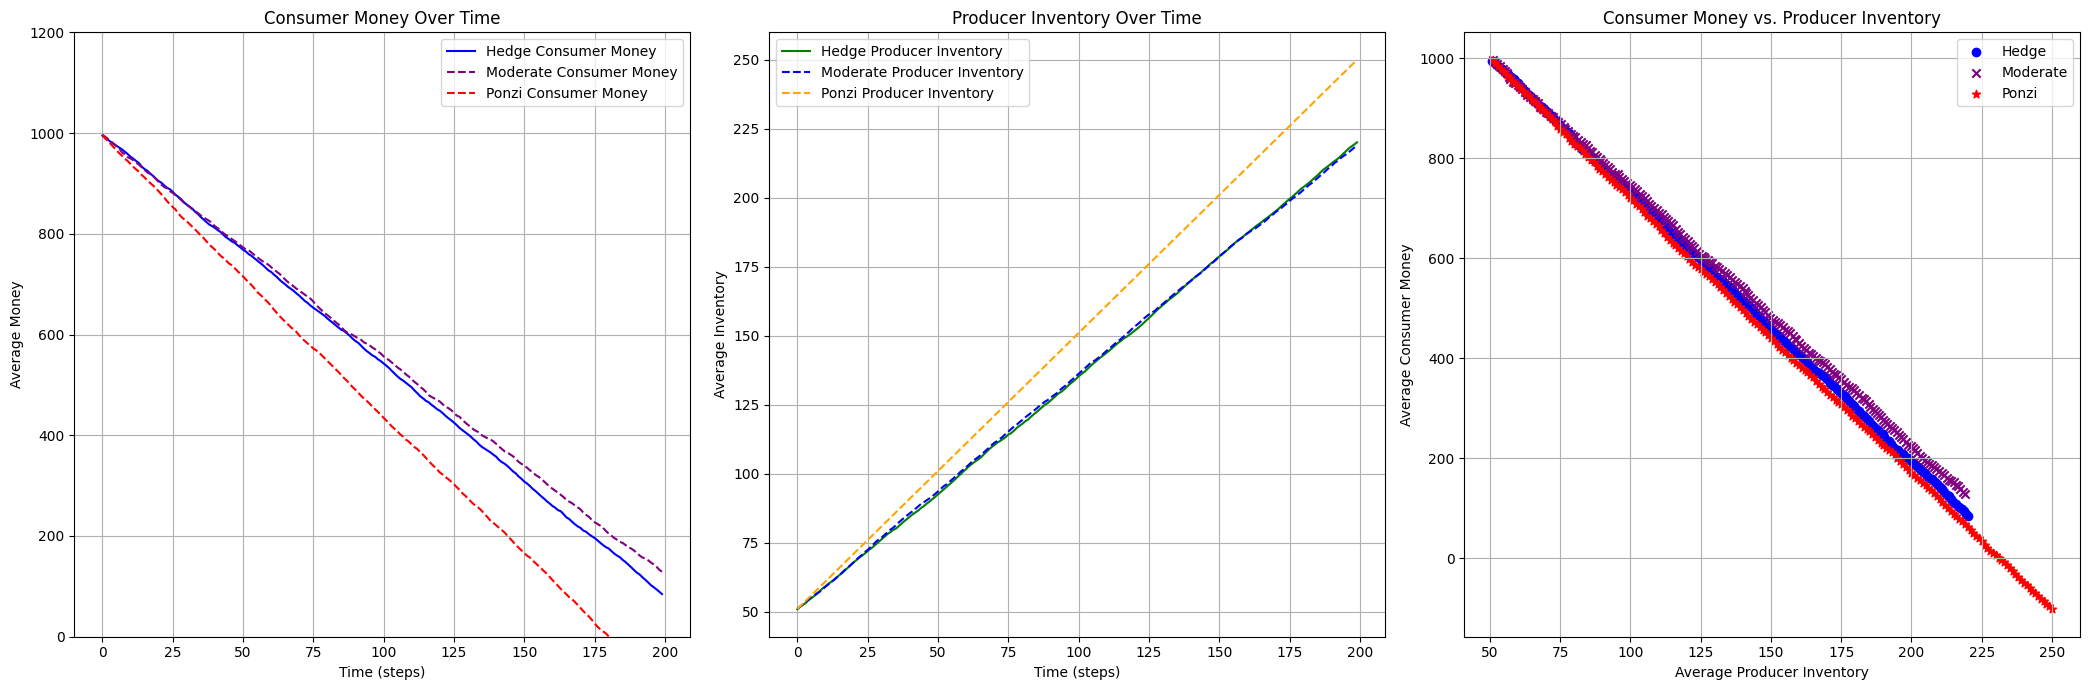

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(21, 7))

# Consumer Money Over Time
plt.subplot(1, 3, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)  # Adjusted to start from 0
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 3, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

# Consumer Money vs. Producer Inventory
plt.subplot(1, 3, 3)
plt.scatter(hedge_producer_inventory_over_time, hedge_consumer_money_over_time, color='blue', label='Hedge')
plt.scatter(moderate_producer_inventory_over_time, moderate_consumer_money_over_time, color='purple', label='Moderate', marker='x')
plt.scatter(ponzi_producer_inventory_over_time, ponzi_consumer_money_over_time, color='red', label='Ponzi', marker='*')
plt.title('Consumer Money vs. Producer Inventory')
plt.xlabel('Average Producer Inventory')
plt.ylabel('Average Consumer Money')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()



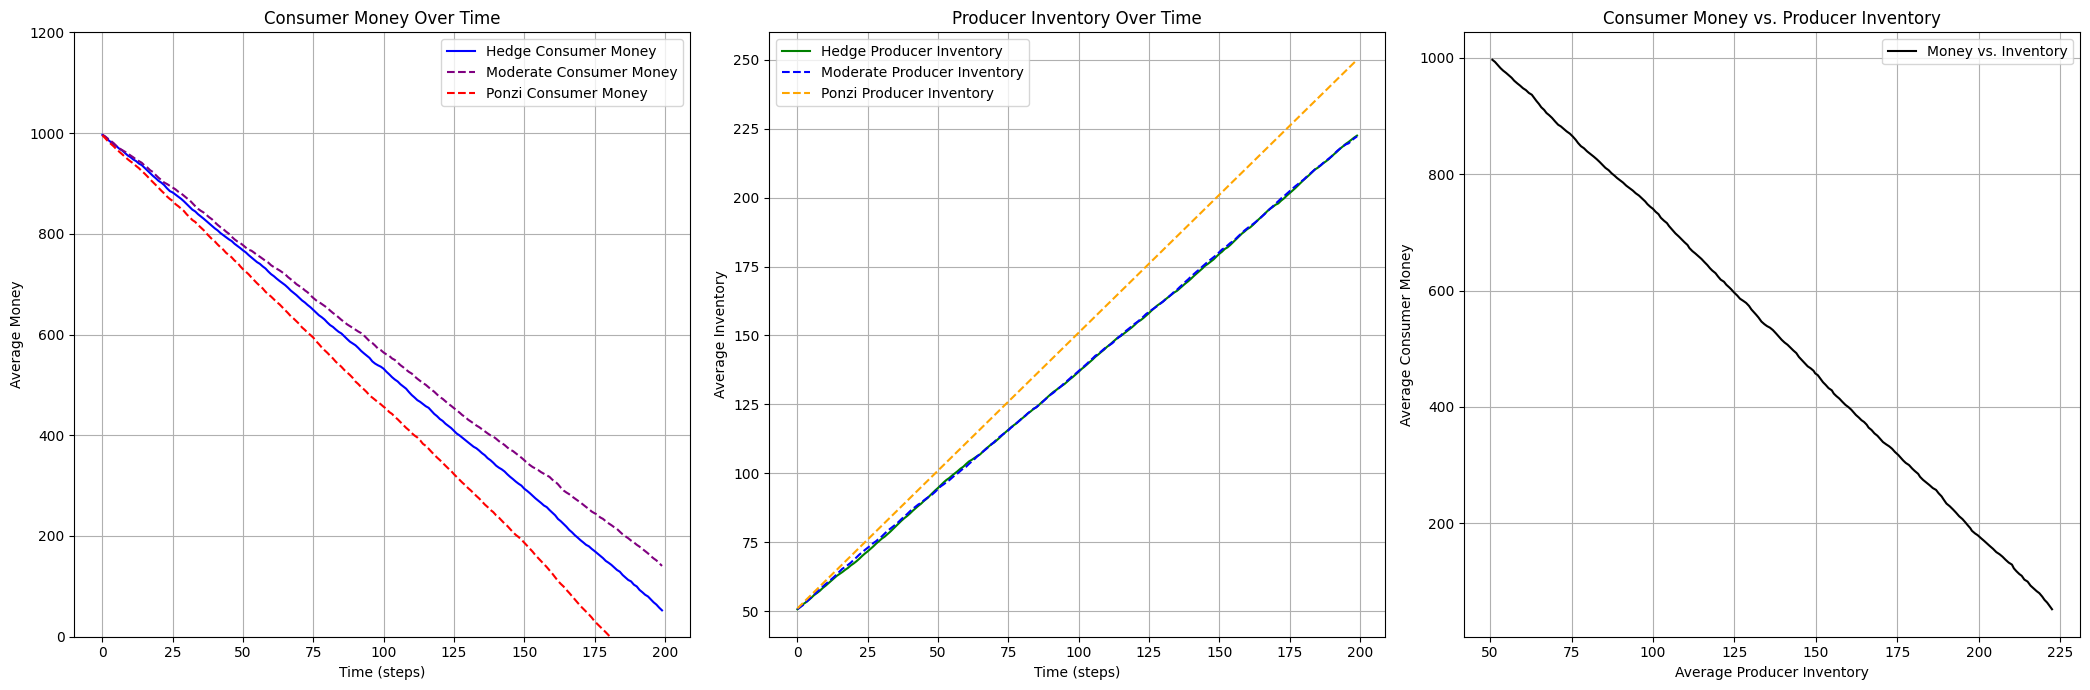

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []
consumer_money_vs_producer_inventory = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))
    consumer_money_vs_producer_inventory.append(
        (np.mean(hedge_consumer_money), np.mean(hedge_producer_inventory))
    )

# Visualization
plt.figure(figsize=(21, 7))

# Consumer Money Over Time
plt.subplot(1, 3, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)  # Adjusted to start from 0
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 3, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

# Consumer Money vs. Producer Inventory
plt.subplot(1, 3, 3)
consumer_money, producer_inventory = zip(*consumer_money_vs_producer_inventory)
plt.plot(producer_inventory, consumer_money, color='black', label='Money vs. Inventory')
plt.title('Consumer Money vs. Producer Inventory')
plt.xlabel('Average Producer Inventory')
plt.ylabel('Average Consumer Money')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


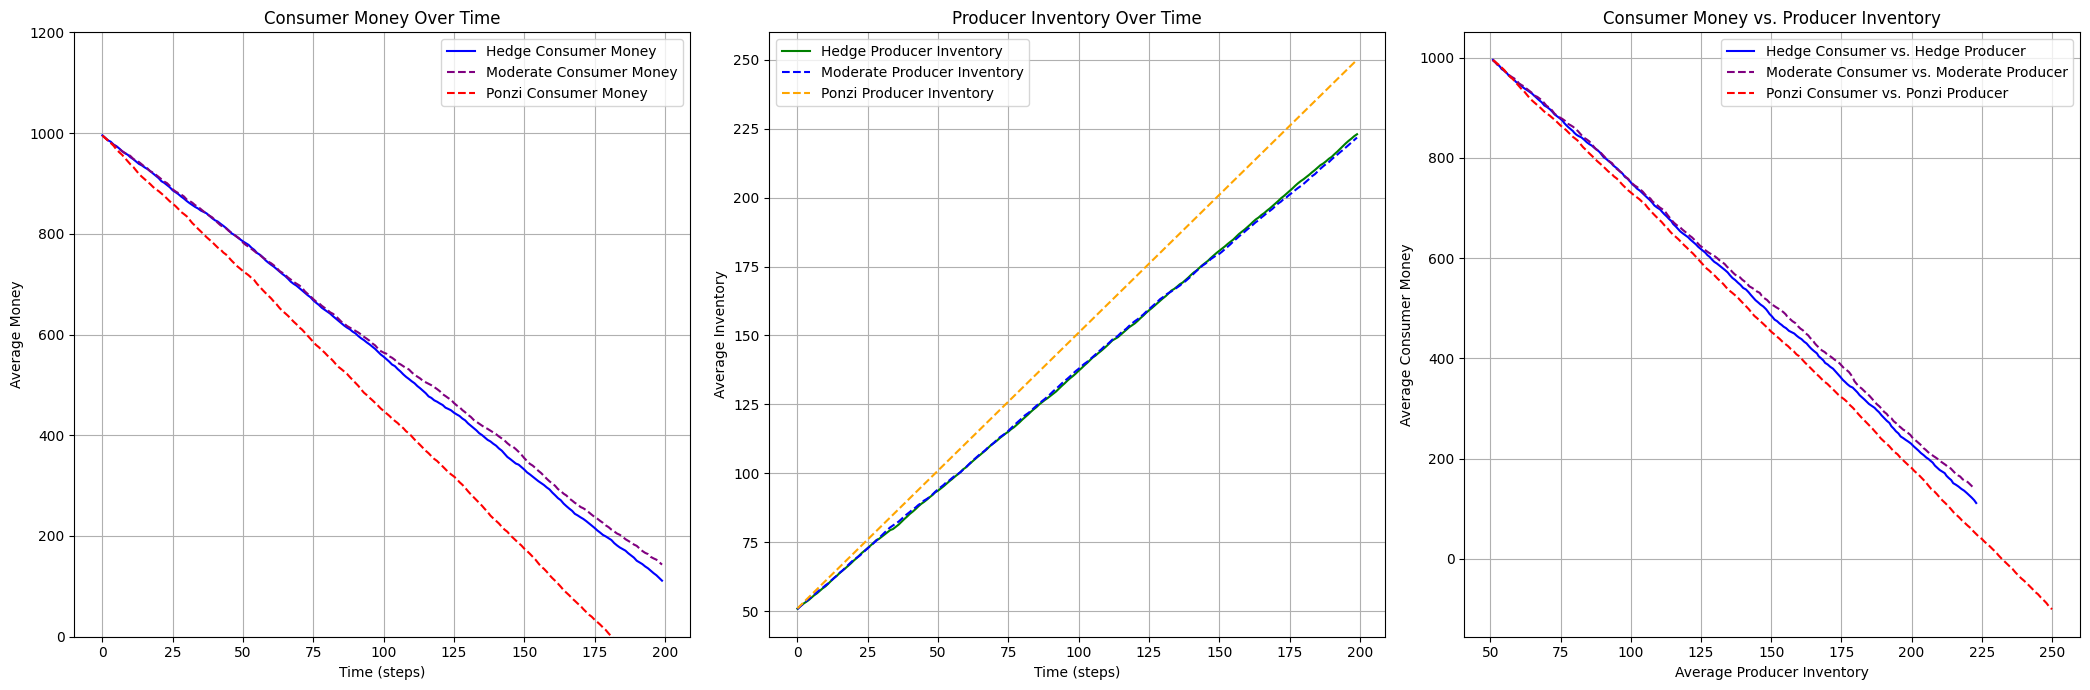

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))

# Visualization
plt.figure(figsize=(21, 7))

# Consumer Money Over Time
plt.subplot(1, 3, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)  # Adjusted to start from 0
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 3, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

# Consumer Money vs. Producer Inventory Over Time
plt.subplot(1, 3, 3)
plt.plot(hedge_producer_inventory_over_time, hedge_consumer_money_over_time, color='blue', label='Hedge Consumer vs. Hedge Producer')
plt.plot(moderate_producer_inventory_over_time, moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer vs. Moderate Producer')
plt.plot(ponzi_producer_inventory_over_time, ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer vs. Ponzi Producer')
plt.title('Consumer Money vs. Producer Inventory')
plt.xlabel('Average Producer Inventory')
plt.ylabel('Average Consumer Money')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


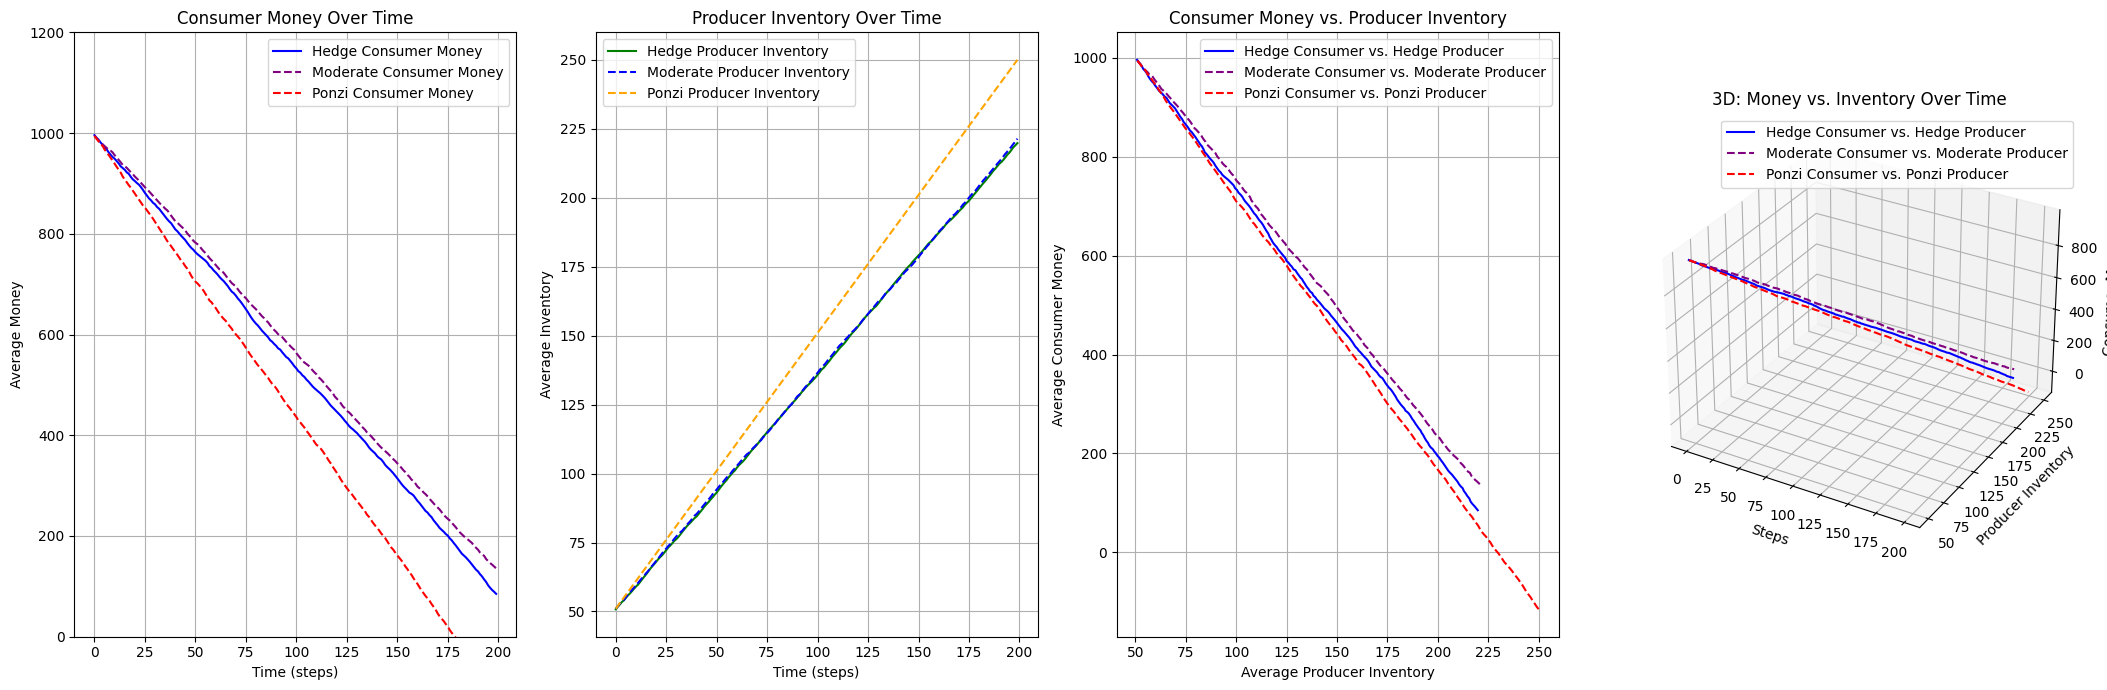

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Hedge Consumer agent with loss aversion
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate consumption decision based on loss aversion
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        utility_loss = self.loss_aversion * (price - np.random.uniform(5, 15))
        if utility_gain > utility_loss:
            self.money -= price

# Moderate Consumer agent
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate moderate consumption decision
        price = np.random.uniform(1, 10)
        utility_gain = np.random.uniform(5, 15) - price
        if utility_gain > 0:
            self.money -= price

# Ponzi Consumer agent
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        # Simulate Ponzi-like consumption decision
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Hedge Producer agent with loss aversion
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        # Simulate production decision based on loss aversion
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Moderate Producer agent
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate moderate production decision
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Ponzi Producer agent
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        # Simulate Ponzi-like production decision
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# The main model
class MarketModel(Model):
    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=2)
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=2)
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Instantiate and run the model
model = MarketModel(60, 10, 10)

# Store the results for visualization
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []
steps = []

for i in range(200):
    model.step()

    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    # Record the average money and inventory
    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))
    steps.append(i)

# Visualization
plt.figure(figsize=(21, 7))

# Consumer Money Over Time
plt.subplot(1, 4, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)  # Adjusted to start from 0
plt.title('Consumer Money Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Money')
plt.legend()
plt.grid(True)

# Producer Inventory Over Time
plt.subplot(1, 4, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.title('Producer Inventory Over Time')
plt.xlabel('Time (steps)')
plt.ylabel('Average Inventory')
plt.legend()
plt.grid(True)

# Consumer Money vs. Producer Inventory Over Time
plt.subplot(1, 4, 3)
plt.plot(hedge_producer_inventory_over_time, hedge_consumer_money_over_time, color='blue', label='Hedge Consumer vs. Hedge Producer')
plt.plot(moderate_producer_inventory_over_time, moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer vs. Moderate Producer')
plt.plot(ponzi_producer_inventory_over_time, ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer vs. Ponzi Producer')
plt.title('Consumer Money vs. Producer Inventory')
plt.xlabel('Average Producer Inventory')
plt.ylabel('Average Consumer Money')
plt.legend()
plt.grid(True)

# 3D Plot: Consumer Money and Producer Inventory Over Time
ax = plt.subplot(1, 4, 4, projection='3d')
ax.plot(steps, hedge_producer_inventory_over_time, hedge_consumer_money_over_time, color='blue', label='Hedge Consumer vs. Hedge Producer')
ax.plot(steps, moderate_producer_inventory_over_time, moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer vs. Moderate Producer')
ax.plot(steps, ponzi_producer_inventory_over_time, ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer vs. Ponzi Producer')
ax.set_title('3D: Money vs. Inventory Over Time')
ax.set_xlabel('Steps')
ax.set_ylabel('Producer Inventory')
ax.set_zlabel('Consumer Money')
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid

# Agente HedgeConsumer
class HedgeConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money, loss_aversion):
        super().__init__(unique_id, model)
        self.money = initial_money
        self.loss_aversion = loss_aversion

    def step(self):
        price = np.random.uniform(1, 10)
        gain = np.random.uniform(5, 15)
        utility_gain = gain - price
        utility_loss = self.loss_aversion * (price - gain)
        if utility_gain > utility_loss:
            self.money -= price

# Agente ModerateConsumer
class ModerateConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        price = np.random.uniform(1, 10)
        gain = np.random.uniform(5, 15)
        utility_gain = gain - price
        if utility_gain > 0:
            self.money -= price

# Agente PonziConsumer
class PonziConsumerAgent(Agent):
    def __init__(self, unique_id, model, initial_money):
        super().__init__(unique_id, model)
        self.money = initial_money

    def step(self):
        price = np.random.uniform(1, 10)
        expected_future_gain = np.random.uniform(10, 20)
        utility_gain = expected_future_gain - price
        if utility_gain > 0:
            self.money -= price

# Agente HedgeProducer
class HedgeProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory, loss_aversion):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory
        self.loss_aversion = loss_aversion

    def step(self):
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        profit_loss = self.loss_aversion * (cost - revenue)
        if profit_gain > profit_loss:
            self.inventory += 1

# Agente ModerateProducer
class ModerateProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        cost = np.random.uniform(1, 10)
        revenue = np.random.uniform(5, 15)
        profit_gain = revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Agente PonziProducer
class PonziProducerAgent(Agent):
    def __init__(self, unique_id, model, initial_inventory):
        super().__init__(unique_id, model)
        self.inventory = initial_inventory

    def step(self):
        cost = np.random.uniform(1, 10)
        expected_future_revenue = np.random.uniform(10, 20)
        profit_gain = expected_future_revenue - cost
        if profit_gain > 0:
            self.inventory += 1

# Definindo o modelo de mercado
class MarketModel(Model):
    def __init__(self, N, width, height):
        super().__init__()
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)

        # Criando e adicionando agentes
        for i in range(self.num_agents):
            if i % 6 == 0:
                a = HedgeConsumerAgent(i, self, initial_money=1000, loss_aversion=1.5)  # Parâmetro
            elif i % 6 == 1:
                a = ModerateConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 2:
                a = PonziConsumerAgent(i, self, initial_money=1000)
            elif i % 6 == 3:
                a = HedgeProducerAgent(i, self, initial_inventory=50, loss_aversion=1.5)  # Parâmetro
            elif i % 6 == 4:
                a = ModerateProducerAgent(i, self, initial_inventory=50)
            else:
                a = PonziProducerAgent(i, self, initial_inventory=50)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))

    def step(self):
        self.schedule.step()

# Modelo de mercado
model = MarketModel(60, 10, 10)

# Listas para armazenar os valores ao longo do tempo
hedge_consumer_money_over_time = []
moderate_consumer_money_over_time = []
ponzi_consumer_money_over_time = []
hedge_producer_inventory_over_time = []
moderate_producer_inventory_over_time = []
ponzi_producer_inventory_over_time = []
steps = []

# Executando o modelo
for i in range(200):
    model.step()

    # Calculando as médias dos consumidores e produtores
    hedge_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, HedgeConsumerAgent)]
    moderate_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, ModerateConsumerAgent)]
    ponzi_consumer_money = [agent.money for agent in model.schedule.agents if isinstance(agent, PonziConsumerAgent)]
    hedge_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, HedgeProducerAgent)]
    moderate_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, ModerateProducerAgent)]
    ponzi_producer_inventory = [agent.inventory for agent in model.schedule.agents if isinstance(agent, PonziProducerAgent)]

    hedge_consumer_money_over_time.append(np.mean(hedge_consumer_money))
    moderate_consumer_money_over_time.append(np.mean(moderate_consumer_money))
    ponzi_consumer_money_over_time.append(np.mean(ponzi_consumer_money))
    hedge_producer_inventory_over_time.append(np.mean(hedge_producer_inventory))
    moderate_producer_inventory_over_time.append(np.mean(moderate_producer_inventory))
    ponzi_producer_inventory_over_time.append(np.mean(ponzi_producer_inventory))
    steps.append(i)

# Plot dos resultados
plt.figure(figsize=(21, 7))

# Gráfico do dinheiro dos consumidores ao longo do tempo
plt.subplot(1, 4, 1)
plt.plot(hedge_consumer_money_over_time, color='blue', label='Hedge Consumer Money')
plt.plot(moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate Consumer Money')
plt.plot(ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi Consumer Money')
plt.ylim(0, 1200)
plt.title('Dinheiro dos Consumidores ao Longo do Tempo')
plt.xlabel('Tempo (etapas)')
plt.ylabel('Dinheiro Médio')
plt.legend()
plt.grid(True)

# Gráfico do inventário dos produtores ao longo do tempo
plt.subplot(1, 4, 2)
plt.plot(hedge_producer_inventory_over_time, color='green', label='Hedge Producer Inventory')
plt.plot(moderate_producer_inventory_over_time, color='blue', linestyle='--', label='Moderate Producer Inventory')
plt.plot(ponzi_producer_inventory_over_time, color='orange', linestyle='--', label='Ponzi Producer Inventory')
plt.ylim(0, 120)
plt.title('Inventário dos Produtores ao Longo do Tempo')
plt.xlabel('Tempo (etapas)')
plt.ylabel('Inventário Médio')
plt.legend()
plt.grid(True)

# Gráfico do dinheiro dos consumidores vs inventário dos produtores
plt.subplot(1, 4, 3)
plt.plot(hedge_consumer_money_over_time, hedge_producer_inventory_over_time, color='blue', label='Hedge Consumer vs Hedge Producer')
plt.plot(moderate_consumer_money_over_time, moderate_producer_inventory_over_time, color='purple', linestyle='--', label='Moderate Consumer vs Moderate Producer')
plt.plot(ponzi_consumer_money_over_time, ponzi_producer_inventory_over_time, color='red', linestyle='--', label='Ponzi Consumer vs Ponzi Producer')
plt.title('Dinheiro dos Consumidores vs Inventário dos Produtores')
plt.xlabel('Dinheiro Médio (Consumidores)')
plt.ylabel('Inventário Médio (Produtores)')
plt.legend()
plt.grid(True)

# Gráfico 3D dos passos vs inventário dos produtores vs dinheiro dos consumidores
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(steps, hedge_producer_inventory_over_time, hedge_consumer_money_over_time, color='blue', label='Hedge')
ax.plot(steps, moderate_producer_inventory_over_time, moderate_consumer_money_over_time, color='purple', linestyle='--', label='Moderate')
ax.plot(steps, ponzi_producer_inventory_over_time, ponzi_consumer_money_over_time, color='red', linestyle='--', label='Ponzi')
ax.set_title('Gráfico 3D: Etapas vs Inventário dos Produtores vs Dinheiro dos Consumidores')
ax.set_xlabel('Etapas')
ax.set_ylabel('Inventário dos Produtores')
ax.set_zlabel('Dinheiro dos Consumidores')
ax.legend()

#plot
plt.tight_layout()
plt.show()
